In [1]:
import os
WM_PROJECT_USER_DIR=os.environ['WM_PROJECT_USER_DIR']
import sys 
sys.path.append(f"{WM_PROJECT_USER_DIR}/utilities")
import numpy as np
import pandas as pd
import postProcess.polyMesh2d as mesh2d
import postProcess.pyResconstruct as pyResconstruct
import postProcess.pyFigure as pyFigure
import postProcess.pyCompute as pyCompute
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mticker
import json
import proplot as plot
import concurrent.futures

## Cases Info 

In [2]:
case_Pe1_3="../../T773_Pe1e-3/"
case_Pe1_2="../../T773_Pe1e-2/"
case_Pe1_1="../../T773_Pe1e-1/"
case_Pe5_1="../../T773_Pe5e-1/"

data_folder="postProcess"
save_folder="postProcess/images"
transverse_data_folder="postProcess/transverseAveragedData"

In [3]:
max_t_case_Pe1_3=str(list(np.sort([float(i) for i in pyFigure.get_times_from_data_folder(os.path.join(case_Pe1_3,transverse_data_folder))]))[-1])
print(f"max time of case_Pe1_3: {max_t_case_Pe1_3}")

max_t_case_Pe1_2=str(list(np.sort([float(i) for i in pyFigure.get_times_from_data_folder(os.path.join(case_Pe1_2,transverse_data_folder))]))[-1])
print(f"max time of case_Pe1_2: {max_t_case_Pe1_2}")

max_t_case_Pe1_1=str(list(np.sort([float(i) for i in pyFigure.get_times_from_data_folder(os.path.join(case_Pe1_1,transverse_data_folder))]))[-1])
print(f"max time of case_Pe1_1: {max_t_case_Pe1_1}")

max_t_case_Pe5_1=str(list(np.sort([float(i) for i in pyFigure.get_times_from_data_folder(os.path.join(case_Pe5_1,transverse_data_folder))]))[-1])
print(f"max time of case_Pe5_1: {max_t_case_Pe5_1}")


max time of case_Pe1_3: 20.51
max time of case_Pe1_2: 11.41
max time of case_Pe1_1: 1.61
max time of case_Pe5_1: 0.31


In [4]:
TMax_file_case_Pe1_3="/home/anoldfriend/OpenFOAM/anoldfriend-7/run/cokeCombustion/T773_Pe1e-3/postProcessing/minMaxComponents/0.01/fieldMinMax.dat"
TMax_file_case_Pe1_2="/home/anoldfriend/OpenFOAM/anoldfriend-7/run/cokeCombustion/T773_Pe1e-2/postProcessing/minMaxComponents/0/fieldMinMax.dat"
TMax_file_case_Pe1_1="/home/anoldfriend/OpenFOAM/anoldfriend-7/run/cokeCombustion/T773_Pe1e-1/postProcessing/minMaxComponents/0/fieldMinMax.dat"
TMax_file_case_Pe5_1="/home/anoldfriend/OpenFOAM/anoldfriend-7/run/cokeCombustion/T773_Pe5e-1/postProcessing/minMaxComponents/0.01/fieldMinMax.dat"

## Maximum Temperature with time

### Max Point Temperature

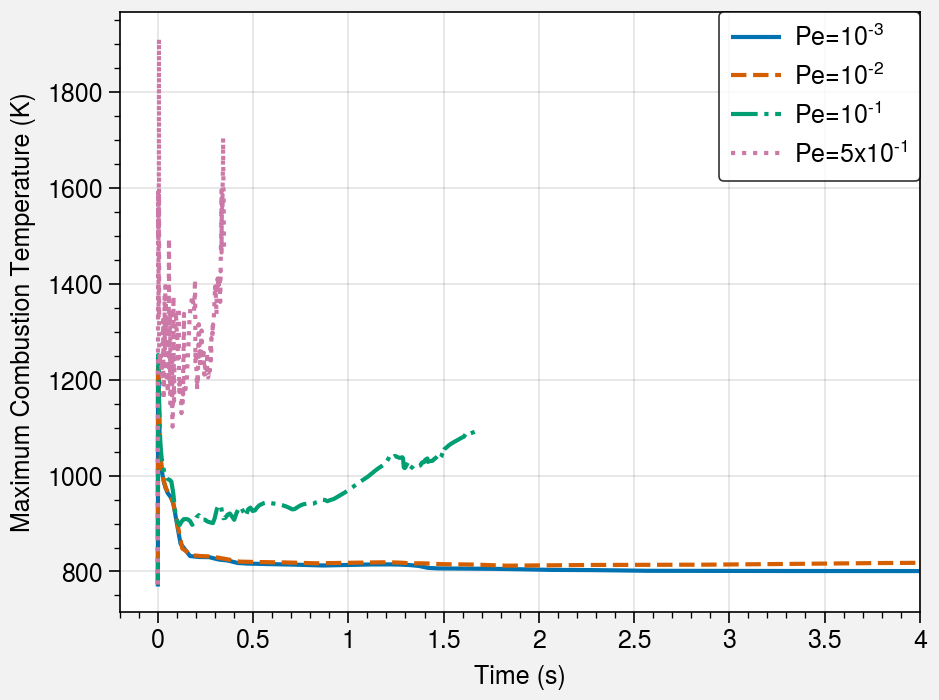

In [5]:
sampling_rate=100
df_maxT_case_Pe1_3=pyFigure.read_min_max_field(TMax_file_case_Pe1_3,sampling_rate,'T')
df_maxT_case_Pe1_2=pyFigure.read_min_max_field(TMax_file_case_Pe1_2,sampling_rate,'T')
df_maxT_case_Pe1_1=pyFigure.read_min_max_field(TMax_file_case_Pe1_1,sampling_rate,'T')
df_maxT_case_Pe5_1=pyFigure.read_min_max_field(TMax_file_case_Pe5_1,sampling_rate,'T')

fig, ax = plot.subplots( aspect=(4, 3), axwidth=4)
ax.plot(df_maxT_case_Pe1_3["Time"],df_maxT_case_Pe1_3["max"],label="Pe=10$^{-3}$",ls="-")

ax.plot(df_maxT_case_Pe1_2["Time"],df_maxT_case_Pe1_2["max"],label="Pe=10$^{-2}$",ls="--")

ax.plot(df_maxT_case_Pe1_1["Time"],df_maxT_case_Pe1_1["max"],label="Pe=10$^{-1}$",ls="-.")

ax.plot(df_maxT_case_Pe5_1["Time"],df_maxT_case_Pe5_1["max"],label="Pe=5x10$^{-1}$",ls=":")

ax.legend(loc="upper right", ncol=1, fancybox=True)
ax.format( xlabel="Time (s)",xlim=(-0.2,4),
           ylabel="Maximum Combustion Temperature (K)", )

In [6]:
max_component_file_case_Pe1_3="/home/anoldfriend/OpenFOAM/anoldfriend-7/run/cokeCombustion/T773_Pe1e-3/postProcessing/minMaxComponents2/20.51/fieldMinMax.dat"
max_component_file_case_Pe1_2="/home/anoldfriend/OpenFOAM/anoldfriend-7/run/cokeCombustion/T773_Pe1e-2/postProcessing/minMaxComponents2/11.5/fieldMinMax.dat"
max_component_file_case_Pe1_1="/home/anoldfriend/OpenFOAM/anoldfriend-7/run/cokeCombustion/T773_Pe1e-1/postProcessing/minMaxComponents2/1.69/fieldMinMax.dat"
max_component_file_case_Pe5_1="/home/anoldfriend/OpenFOAM/anoldfriend-7/run/cokeCombustion/T773_Pe5e-1/postProcessing/minMaxComponents2/0.31/fieldMinMax.dat"

df_combined_case_Pe1_3=pyCompute.computeMaxTemperatureAndOutletO2ConcHistory(max_component_file_case_Pe1_3,os.path.join(case_Pe1_3,transverse_data_folder))

df_combined_case_Pe1_2=pyCompute.computeMaxTemperatureAndOutletO2ConcHistory(max_component_file_case_Pe1_2,os.path.join(case_Pe1_2,transverse_data_folder))

df_combined_case_Pe1_1=pyCompute.computeMaxTemperatureAndOutletO2ConcHistory(max_component_file_case_Pe1_1,os.path.join(case_Pe1_1,transverse_data_folder))

df_combined_case_Pe5_1=pyCompute.computeMaxTemperatureAndOutletO2ConcHistory(max_component_file_case_Pe5_1,os.path.join(case_Pe5_1,transverse_data_folder))

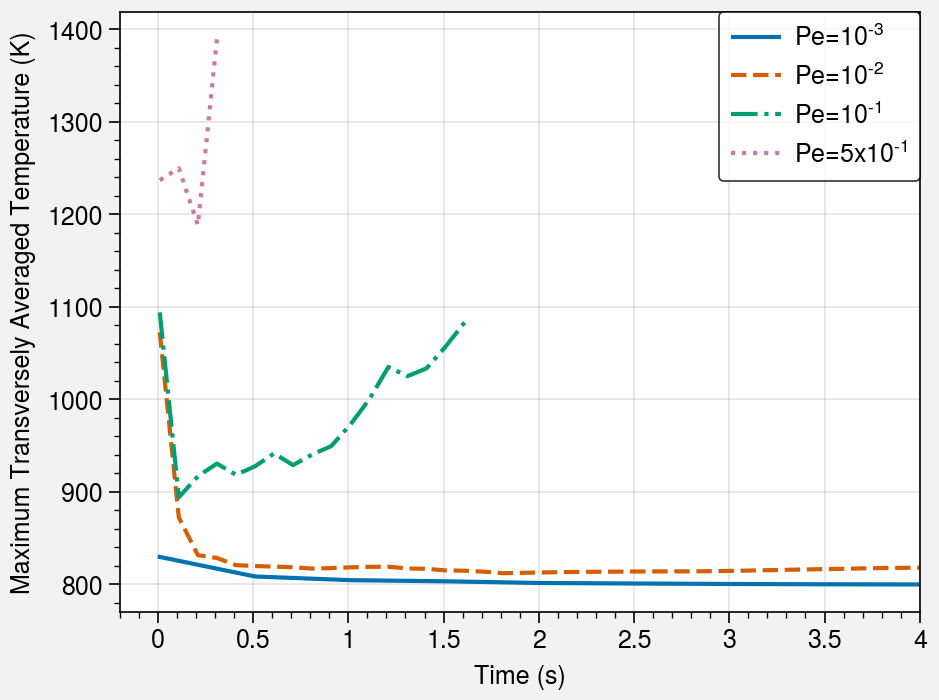

In [7]:
fig, ax = plot.subplots( aspect=(4, 3), axwidth=4)
ax.plot(df_combined_case_Pe1_3["Time"],df_combined_case_Pe1_3["Transverse_Tmax"],label="Pe=10$^{-3}$",ls="-")

ax.plot(df_combined_case_Pe1_2["Time"],df_combined_case_Pe1_2["max"],label="Pe=10$^{-2}$",ls="--")

ax.plot(df_combined_case_Pe1_1["Time"],df_combined_case_Pe1_1["max"],label="Pe=10$^{-1}$",ls="-.")

ax.plot(df_combined_case_Pe5_1["Time"],df_combined_case_Pe5_1["max"],label="Pe=5x10$^{-1}$",ls=":")

ax.legend(loc="upper right", ncol=1, fancybox=True)
ax.format( xlabel="Time (s)",xlim=(-0.2,4),
           ylabel="Maximum Transversely Averaged Temperature (K)", )
fig.savefig('./MaximumTransverselyAveragedTemperature.jpg', dpi=600)

### comments
1. When Pe increase from 1e-2 to 1e-3 with 1 folder, the combustion temperature just increase a little. The reason come from that the diffusive flux contribute a lot when the Pe is 1e-2, resulting in the comparable total O2 flux at the inlet between Pe of 1e-2 and Pe 1-3
2. When Pe exceed 1e-1, the combustion temperature keep increasing, even higher than 1400 K with the Pe of 5e-1. The combustion may leave from the smouldering to the gas-phase combustion, which is much intensive than the smoundering and not desirable for in-situ combustion technique

## reaction rate with Pe/O2 Flux 

In [8]:
df_rate_case_Pe1_3=pd.read_csv(os.path.join(case_Pe1_3,"postProcess/others/ReactionRateAndBurningRate.csv"))
df_rate_case_Pe1_2=pd.read_csv(os.path.join(case_Pe1_2,"postProcess/others/ReactionRateAndBurningRate.csv"))
df_rate_case_Pe1_1=pd.read_csv(os.path.join(case_Pe1_1,"postProcess/others/ReactionRateAndBurningRate.csv"))
df_rate_case_Pe5_1=pd.read_csv(os.path.join(case_Pe5_1,"postProcess/others/ReactionRateAndBurningRate.csv"))

coke_rate_case_Pe1_3=list(df_rate_case_Pe1_3[df_rate_case_Pe1_3["time"]==float(max_t_case_Pe1_3)]["vol_averaged_reaction_rate"])[0]
coke_rate_case_Pe1_2=list(df_rate_case_Pe1_2[df_rate_case_Pe1_2["time"]==float(max_t_case_Pe1_2)]["vol_averaged_reaction_rate"])[0]
coke_rate_case_Pe1_1=list(df_rate_case_Pe1_1[df_rate_case_Pe1_1["time"]==float(max_t_case_Pe1_1)]["vol_averaged_reaction_rate"])[0]
coke_rate_case_Pe5_1=list(df_rate_case_Pe5_1[df_rate_case_Pe5_1["time"]==float(max_t_case_Pe5_1)]["vol_averaged_reaction_rate"])[0]

Pe=[1e-3,1e-2,1e-1,5e-1]
coke_rates=[coke_rate_case_Pe1_3,coke_rate_case_Pe1_2,coke_rate_case_Pe1_1,coke_rate_case_Pe5_1]

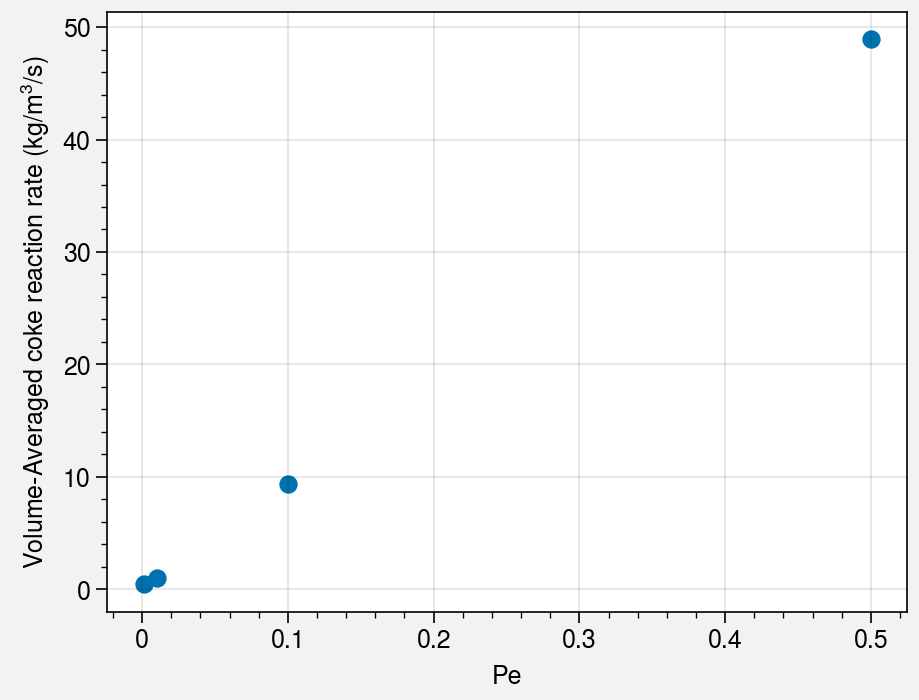

In [9]:
fig, ax = plot.subplots( aspect=(4, 3), axwidth=4)
ax.scatter(Pe,coke_rates)
ax.format(xlabel="Pe",#xscale="log", xformatter='sci',
          ylabel="Volume-Averaged coke reaction rate (kg/m$^3$/s)")
fig.savefig('./cokeReactionRate~Pe.jpg', dpi=600)         

In [10]:
pixelResolution=0.5e-6
DO2=7.63596e-6

def process_df_O2_flux(df_O2_flux_at_inlet,DO2=7.63596e-6,pixelResolution=0.5e-6):
    df_O2_flux_at_inlet["diffusive_flux"]=np.array(df_O2_flux_at_inlet["O2_diffusive_Flux_By_DO2"])*DO2
    df_O2_flux_at_inlet["advective_flux"]=np.array(df_O2_flux_at_inlet["O2_adv_flux_by_deltaX"])*pixelResolution
    df_O2_flux_at_inlet["total_flux"]=df_O2_flux_at_inlet["diffusive_flux"]+df_O2_flux_at_inlet["advective_flux"]
    return df_O2_flux_at_inlet

In [11]:
df_O2_flux_at_inlet_case_Pe1_3=pd.read_csv(os.path.join(case_Pe1_3,"postProcess/others/O2FluxsAtInlet.csv"))
df_O2_flux_at_inlet_case_Pe1_2=pd.read_csv(os.path.join(case_Pe1_2,"postProcess/others/O2FluxsAtInlet.csv"))
df_O2_flux_at_inlet_case_Pe1_1=pd.read_csv(os.path.join(case_Pe1_1,"postProcess/others/O2FluxsAtInlet.csv"))
df_O2_flux_at_inlet_case_Pe5_1=pd.read_csv(os.path.join(case_Pe5_1,"postProcess/others/O2FluxsAtInlet.csv"))

df_O2_flux_at_inlet_case_Pe1_3=process_df_O2_flux(df_O2_flux_at_inlet_case_Pe1_3)
df_O2_flux_at_inlet_case_Pe1_2=process_df_O2_flux(df_O2_flux_at_inlet_case_Pe1_2)
df_O2_flux_at_inlet_case_Pe1_1=process_df_O2_flux(df_O2_flux_at_inlet_case_Pe1_1)
df_O2_flux_at_inlet_case_Pe5_1=process_df_O2_flux(df_O2_flux_at_inlet_case_Pe5_1)




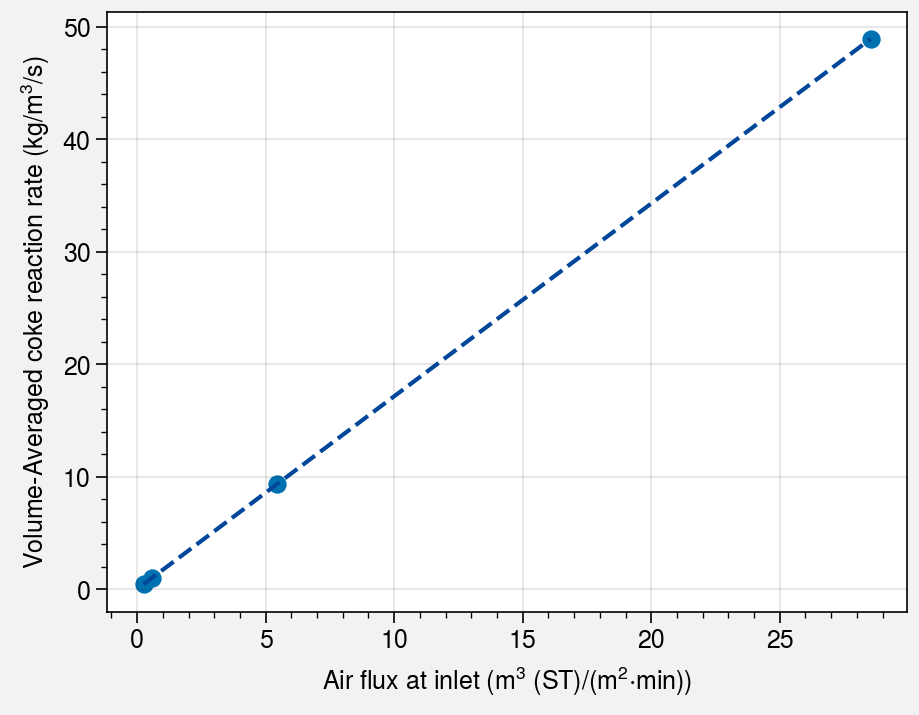

In [17]:
total_O2_flux_case_Pe1_3=list(df_O2_flux_at_inlet_case_Pe1_3[df_O2_flux_at_inlet_case_Pe1_3["time"]==float(max_t_case_Pe1_3)]["total_flux"])[0]
total_O2_flux_case_Pe1_2=list(df_O2_flux_at_inlet_case_Pe1_2[df_O2_flux_at_inlet_case_Pe1_2["time"]==float(max_t_case_Pe1_2)]["total_flux"])[0]
total_O2_flux_case_Pe1_1=list(df_O2_flux_at_inlet_case_Pe1_1[df_O2_flux_at_inlet_case_Pe1_1["time"]==float(max_t_case_Pe1_1)]["total_flux"])[0]
total_O2_flux_case_Pe5_1=list(df_O2_flux_at_inlet_case_Pe5_1[df_O2_flux_at_inlet_case_Pe5_1["time"]==float(max_t_case_Pe5_1)]["total_flux"])[0]

total_O2_fluxs=[total_O2_flux_case_Pe1_3,total_O2_flux_case_Pe1_2,total_O2_flux_case_Pe1_1,total_O2_flux_case_Pe5_1]

O2Fraction=0.22
rhoST=1.2758
area=1*1200*pixelResolution #z 1m 
total_O2_flux_ST_volume=[ flux/O2Fraction/rhoST/area*60 for flux in total_O2_fluxs] #m3 (ST)/(m2 min) 

fig, ax = plot.subplots( aspect=(4, 3), axwidth=4)
ax.scatter(total_O2_flux_ST_volume,coke_rates)

coef = np.polyfit(total_O2_flux_ST_volume,coke_rates,1)
poly1d_fn = np.poly1d(coef) 
ax.plot(total_O2_flux_ST_volume,poly1d_fn(total_O2_flux_ST_volume),ls="--",color=plot.scale_luminance('cerulean', 0.5))

ax.format(xlabel="Air flux at inlet (m$^3$ (ST)/(m$^2$$\cdot$min))",
          ylabel="Volume-Averaged coke reaction rate (kg/m$^3$/s)")
fig.savefig('./cokeReactionRate~AirFlux.jpg', dpi=600)

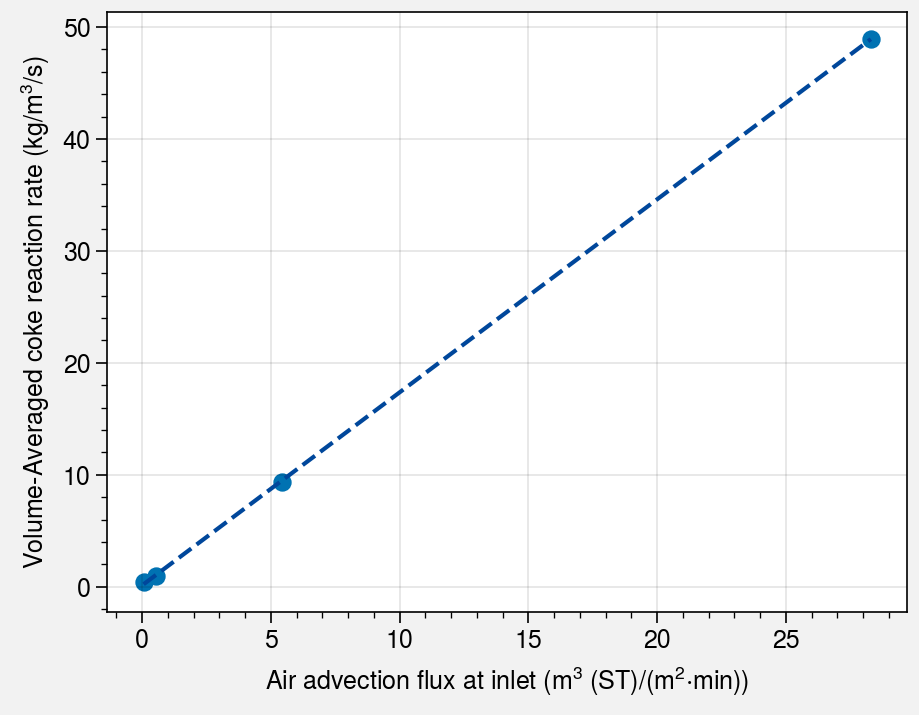

In [18]:
advective_O2_flux_case_Pe1_3=list(df_O2_flux_at_inlet_case_Pe1_3[df_O2_flux_at_inlet_case_Pe1_3["time"]==float(max_t_case_Pe1_3)]["advective_flux"])[0]
advective_O2_flux_case_Pe1_2=list(df_O2_flux_at_inlet_case_Pe1_2[df_O2_flux_at_inlet_case_Pe1_2["time"]==float(max_t_case_Pe1_2)]["advective_flux"])[0]
advective_O2_flux_case_Pe1_1=list(df_O2_flux_at_inlet_case_Pe1_1[df_O2_flux_at_inlet_case_Pe1_1["time"]==float(max_t_case_Pe1_1)]["advective_flux"])[0]
advective_O2_flux_case_Pe5_1=list(df_O2_flux_at_inlet_case_Pe5_1[df_O2_flux_at_inlet_case_Pe5_1["time"]==float(max_t_case_Pe5_1)]["advective_flux"])[0]

advective_O2_fluxs=[advective_O2_flux_case_Pe1_3,advective_O2_flux_case_Pe1_2,advective_O2_flux_case_Pe1_1,advective_O2_flux_case_Pe5_1]

O2Fraction=0.22
rhoST=1.2758
area=1*1200*pixelResolution #z 1m 
advective_O2_flux_ST_volume=[ flux/O2Fraction/rhoST/area*60 for flux in advective_O2_fluxs] #m3 (ST)/(m2 min) 

fig, ax = plot.subplots( aspect=(4, 3), axwidth=4)
ax.scatter(advective_O2_flux_ST_volume,coke_rates)

coef = np.polyfit(advective_O2_flux_ST_volume,coke_rates,1)
poly1d_fn = np.poly1d(coef) 
ax.plot(advective_O2_flux_ST_volume,poly1d_fn(advective_O2_flux_ST_volume),ls="--",color=plot.scale_luminance('cerulean', 0.5))

ax.format(xlabel="Air advection flux at inlet (m$^3$ (ST)/(m$^2$$\cdot$min))",
          ylabel="Volume-Averaged coke reaction rate (kg/m$^3$/s)")
fig.savefig('./cokeReactionRate~AiradvectionFlux.jpg', dpi=600)


### Comments 
1. Almost linear, confirming the mechanism is the O2 transfer (advection) limited

### Combustion front behavoirs 

In [15]:
df_transverse_case_Pe1_3=pd.read_csv(os.path.join(os.path.join(case_Pe1_3,transverse_data_folder),f"{max_t_case_Pe1_3}.csv"))

df_transverse_case_Pe1_2=pd.read_csv(os.path.join(os.path.join(case_Pe1_2,transverse_data_folder),f"{max_t_case_Pe1_2}.csv"))

df_transverse_case_Pe1_1=pd.read_csv(os.path.join(os.path.join(case_Pe1_1,transverse_data_folder),f"{max_t_case_Pe1_1}.csv"))

df_transverse_case_Pe5_1=pd.read_csv(os.path.join(os.path.join(case_Pe5_1,transverse_data_folder),f"{max_t_case_Pe5_1}.csv"))



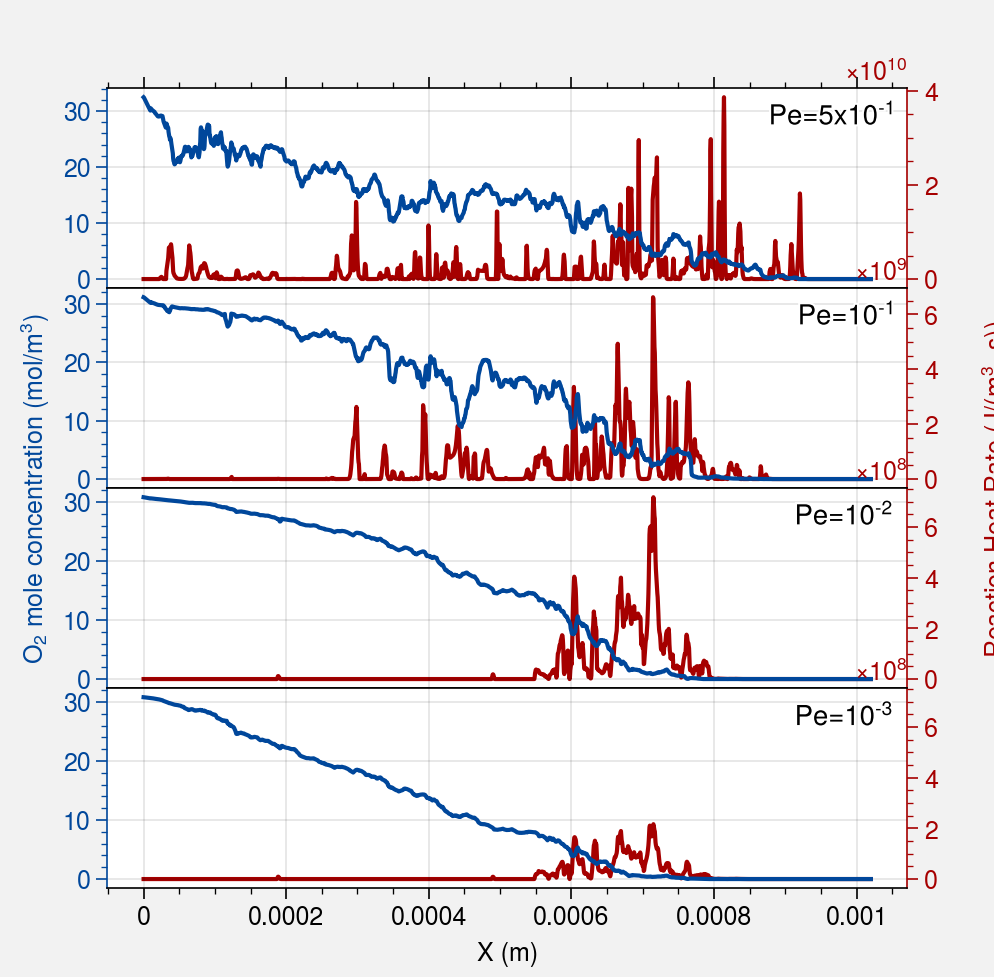

In [16]:
c1 = plot.scale_luminance('cerulean', 0.5)
c2 = plot.scale_luminance('red', 0.5)

fig, axs = plot.subplots(ncols=1, nrows=4,aspect=(4, 1), axwidth=4, hspace=(0, ),sharex=3,sharey=3)

axs_r=axs.alty()
fig.text(0.985, 0.5, "Reaction Heat Rate (J/(m$^3\cdot$s))", color=c2, va='center', rotation='vertical')


axs[0].plot(df_transverse_case_Pe5_1["x"],df_transverse_case_Pe5_1["O2Conc"],color=c1)
axs_r[0].plot(df_transverse_case_Pe5_1["x"],df_transverse_case_Pe5_1["Qdot"],color=c2)
axs[0].format(title="Pe=5x10$^{-1}$",titleloc='ur')
# axs[0].legend()

axs[1].plot(df_transverse_case_Pe1_1["x"],df_transverse_case_Pe1_1["O2Conc"],color=c1)
axs_r[1].plot(df_transverse_case_Pe1_1["x"],df_transverse_case_Pe1_1["Qdot"],color=c2)
axs[1].format(title="Pe=10$^{-1}$",titleloc='ur')
# axs[1].legend()

axs[2].plot(df_transverse_case_Pe1_2["x"],df_transverse_case_Pe1_2["O2Conc"],color=c1)
axs_r[2].plot(df_transverse_case_Pe1_2["x"],df_transverse_case_Pe1_2["Qdot"],color=c2)
axs[2].format(title="Pe=10$^{-2}$",titleloc='ur')
# axs[2].legend()

axs[3].plot(df_transverse_case_Pe1_3["x"],df_transverse_case_Pe1_3["O2Conc"],color=c1)
axs_r[3].plot(df_transverse_case_Pe1_3["x"],df_transverse_case_Pe1_3["Qdot"],color=c2)
axs[3].format(title="Pe=10$^{-3}$",titleloc='ur')
# axs[3].legend()


axs[0].format(xtickloc='top')
axs.format(xlabel="X (m)",ylabel="O$_2$ mole concentration (mol/m$^3$)",ycolor=c1)
axs_r[3].get_shared_y_axes().join(axs_r[3], axs_r[2])
# axs_r[3].get_shared_y_axes().join(axs_r[3], axs_r[2])
# axs_r[0].get_shared_y_axes().join(axs_r[0], axs_r[3])

axs_r.format(ylabel='',ycolor=c2)


# axs_r.autoscale(tight=True)
fig.savefig('./Combustion front behavoirs.jpg', dpi=600,bbox_inches='tight')

In [ ]:
### Comments 
1. The combustion front width gradually increase with Pe